# Installing required libraries


In [2]:
# Enforce pytorch version 1.6.0
import torch
if torch.__version__ != '1.6.0':
  !pip uninstall torch -y
  !pip uninstall torchvision -y
  !pip install torch==1.6.0
  !pip install torchvision==0.7.0

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

1.6.0
10.2
Python 3.7.12
/bin/bash: nvidia-smi: command not found


In [3]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 2.9 MB 1.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.6 MB 1.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 1.1 MB 1.6 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.6.0+cu102.html
     |████████████████████████████████| 371 kB 1.6 MB/s 


# Connecting to goole drive and freezing project path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Reading the file
project_path='drive/MyDrive/Colab Notebooks/Graphs'
filename='/lat_long - lat_long.csv'
import pandas as pd
cordinates=pd.read_csv(project_path+filename)

In [11]:
cordinates.head()

,Id,latitude,longitude
0,0,87.333294,144.484409
1,1,-22.605420,143.376342
2,2,-43.531545,-78.595627
3,3,-50.787744,-8.422739
4,4,-49.270064,-62.172244


In [71]:
# Using KMeans clustering to find the ideal number of clusters
from tqdm import tqdm
df=np.round(cordinates,2)
from sklearn.cluster import KMeans
inertias=[]
index=[]
for i in tqdm(range(5,50)):
  km=KMeans(n_clusters=i)
  km.fit(df)
  inertias.append(km.inertia_)
  index.append(i)


100%|██████████| 45/45 [07:04<00:00,  9.43s/it]


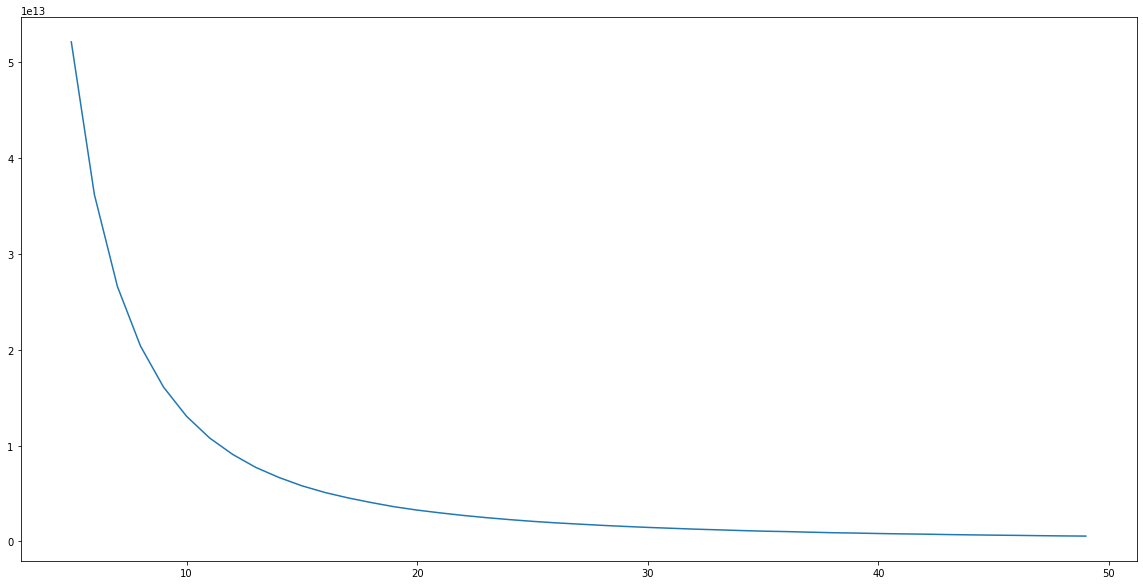

In [72]:
# Elbow method to find ideal number of cluster
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(index,inertias)



In [75]:
# Creating a Kmeans clustering with 18 clusters
df=np.round(cordinates,2)
km=KMeans(n_clusters=14,random_state=1)
km.fit(df)
df['cluster']=km.predict(cordinates)
df['cluster']=df['cluster'].astype('object')

In [77]:
df.head()

,Id,latitude,longitude,cluster
0,0,87.33,144.48,1
1,1,-22.61,143.38,1
2,2,-43.53,-78.60,1
3,3,-50.79,-8.42,1
4,4,-49.27,-62.17,1


In [86]:
# Converting the CSV file into Pytorch geometry
from tqdm import tqdm
x=[]
for i,row in tqdm(df.iterrows()):
  value=[row['latitude'],row['longitude']]
  x.append(value)

250000it [00:17, 14562.28it/s]


In [79]:
x

NameError: ignored